<a href="https://colab.research.google.com/github/michaeldouglas/mba_IA_ML-proj_int-grupo_b/blob/main/Python/Trabalho_deep_learning_reinforcement_learning/CoronaHack_exercicio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercício 5

CoronaHack-Chest X-Ray-Dataset:

Classificar apenas se existe Pneumonia ou Não, opcionalmente classificar a existência de COVID-19.

In [14]:
#@title Importação das bibliotecas
import keras
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import preprocessing
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import img_to_array , load_img

In [2]:
#@title Importação das imagens
# Pelo fato do zip ser grande tomamos a decisão de deixar no Drive
# https://www.dropbox.com/s/zmo4c6pzwcgd9c4/562468_1022626_bundle_archive.zip? dl=0
with zipfile.ZipFile('/content/drive/MyDrive/Coronahack.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Datasets')

In [3]:
#@title Define a arquitetura da rede
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [4]:
#@title Compile o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
#@title Gerador de imagem com 20% das imagens para validação
train_datagen = ImageDataGenerator(validation_split=0.20, rescale=1./255)

# Leitura dos diretórios de imagens
train_generator = train_datagen.flow_from_directory(
        '/content/Datasets/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset',
        batch_size=200,
        color_mode = 'grayscale',
        target_size=(30, 30),
        subset='training',
        classes=['test'],
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        '/content/Datasets/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset',
        batch_size=200,
        color_mode = 'grayscale',
        target_size=(30, 30),
        subset='validation',
        classes=['test'],
        class_mode='categorical')

Found 500 images belonging to 1 classes.
Found 125 images belonging to 1 classes.


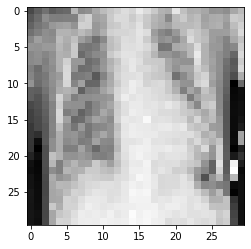

In [32]:
#@title Visualizando a imagem
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]   
    plt.imshow(image[:,:,0], cmap=plt.get_cmap('gray'))
    plt.show()

In [8]:
#@title Treinando o modelo
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=10,
      validation_data=validation_generator,
      validation_steps=len(validation_generator))

Epoch 1/10
22/22 [==============================] - 40s 2s/step - loss: 16672.8242 - accuracy: 0.5285 - val_loss: 8632.7334 - val_accuracy: 1.0000
Epoch 2/10
22/22 [==============================] - 40s 2s/step - loss: 34279.6328 - accuracy: 0.4350 - val_loss: 16138.7256 - val_accuracy: 1.0000
Epoch 3/10
22/22 [==============================] - 40s 2s/step - loss: 62820.5859 - accuracy: 0.5226 - val_loss: 196398.4844 - val_accuracy: 0.0000e+00
Epoch 4/10
22/22 [==============================] - 41s 2s/step - loss: 166971.4062 - accuracy: 0.5650 - val_loss: 158557.9375 - val_accuracy: 0.0000e+00
Epoch 5/10
22/22 [==============================] - 40s 2s/step - loss: 203108.7500 - accuracy: 0.4235 - val_loss: 482442.9688 - val_accuracy: 1.0000
Epoch 6/10
22/22 [==============================] - 38s 2s/step - loss: 249087.7969 - accuracy: 0.5290 - val_loss: 3186.3225 - val_accuracy: 0.4194
Epoch 7/10
22/22 [==============================] - 42s 2s/step - loss: 198805.0312 - accuracy: 0.50

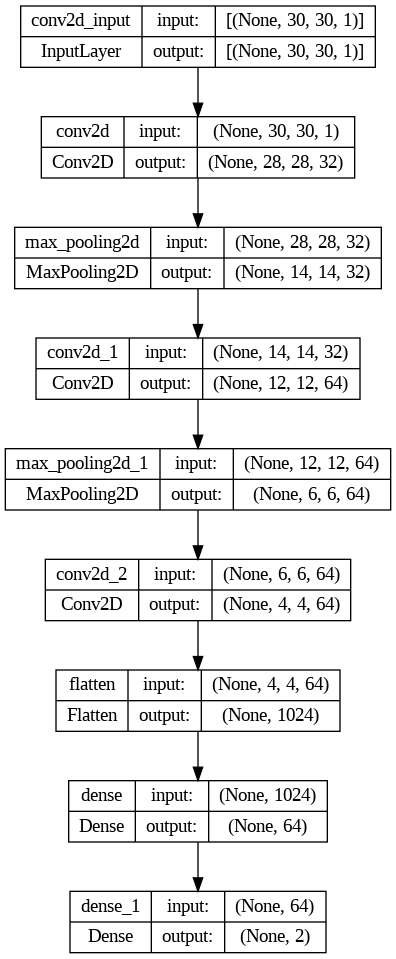

In [9]:
#@title Plot das camadas
plot_model(model, to_file='coronahack.png', show_shapes=True, show_layer_names=True)

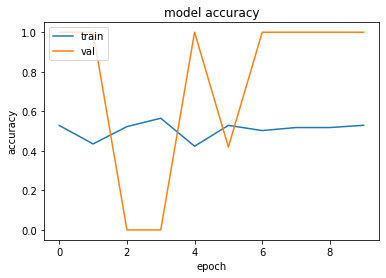

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
#@title Acurácia do nosso modelo
score = model.evaluate(validation_generator, steps=len(validation_generator))
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

1/1 [==============================] - 2s 2s/step - loss: 712587.3750 - accuracy: 1.0000

accuracy: 100.00%


In [12]:
# Salvando o modelo treinado
model.save('model.h5')

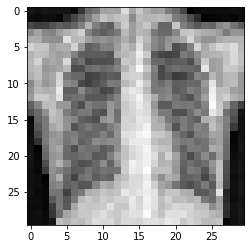

1/1 [==============================] - 0s 84ms/step
Existe Pneumonia na imagem.


In [26]:
model = keras.models.load_model('model.h5')

fileimg = r'/content/Datasets/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0005-0001.jpeg'

img = load_img(fileimg , color_mode = "grayscale", target_size=(30, 30))
img = img_to_array(img)

plt.imshow(img[:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

img = np.expand_dims(img, axis=0)

prediction = model.predict(img)

if np.argmax(prediction) == 0:
    print('Existe Pneumonia na imagem.')
elif np.argmax(prediction) == 1:
    print('Não há Pneumonia na imagem.')

### Considerações finais

O nosso modelo chegou em uma acurácia de 100%. Isso fornece um bom alvo para classificar amostras de pneumonia ou não.